<a href="https://colab.research.google.com/github/sechiyo97/studyDeeplearning/blob/master/deeplearning_ch4_0528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


신경망 학습

In [0]:
import sys
import numpy as np
import matplotlib.pylab as plt
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/DeepLearning')
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/DeepLearning/ch04')
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/DeepLearning/common')

손실 함수

오차제곱합

In [0]:
def sum_squares_error(y,t):
  return 0.5 * np.sum((y-t)**2)

교차 엔트로피 오차 : 정답일 때의 출력이 전체 값을 정함. 
정답에 해당하는 출력이 커질수록 0에 수렴.


In [0]:
def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

미니배치 학습에서의 손실함수

랜덤 미니배치 뽑아내기

In [19]:
import sys, os
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize= True, one_hot_label = True)

print(x_train.shape) # (60000,784)
print(t_train.shape) # (60000,10)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # train size에서 batch_size만큼 랜덤으로 선택
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

tran

(60000, 784)
(60000, 10)


배치용 교차 엔트로피 오차

In [0]:
def cross_entropy_error(y,t):
  if y.ndim == 1: # (72,) => (1,72)
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y+1e-7)) / batch_size

  """ 정답 레이블이 one-hot encoding이 아니라 2,7 등 숫자 레이블일 경우
  def cross_entropy_error(y,t):
  if y.ndim == 1: 
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size
  """

손실함수의 사용 이유 : 연속적인 값을 가지기 때문 (정확도는 아님)

수치미분

In [0]:
def numerical_diff(f,x): # 중심 차분 or 중앙 차분
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h))/(2*h)

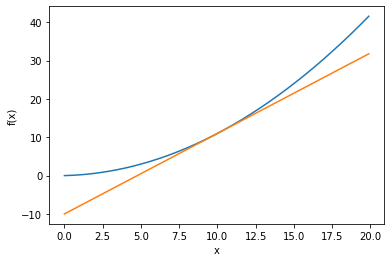

In [44]:
def function_1(x):
  return 0.1*x**2+0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
y_prime = numerical_diff(function_1,x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)f
#plt.plot(x,y_prime)

# 접선
def linear_func(x0, f, x): # 지나가는 점, 기울기, 입력x
  grad = numerical_diff(f,x0)
  return f(x0) + grad*(x-x0)

l = linear_func(10,function_1, x)
plt.plot(x,l)
plt.show()

편미분

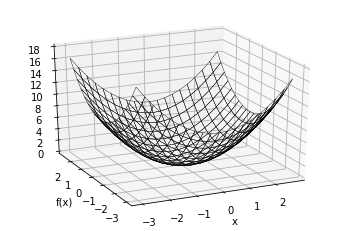

In [261]:
def function_2(x):
  return x[0]**2 + x[1]**2 # x^2+y^2
  # or return sum(x**2)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x1 = np.arange(-3,3,0.3)
x2 = np.arange(-3,3,0.3)
x, y = np.array(np.meshgrid(x1,x2))
z = function_2((x,y))

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x,y,z, edgecolor='black', linewidth=0.4, shade=False) # facecolors=colors,
surf.set_facecolor((0,0,0,0))
ax.view_init(25,245)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

양 축에 대한 편미분

In [0]:
def numerical_gradient(f,x):
  h = 1e-4 # 0.0001n
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(len(x)):
    tmp_val = x[idx]

    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)
    
    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

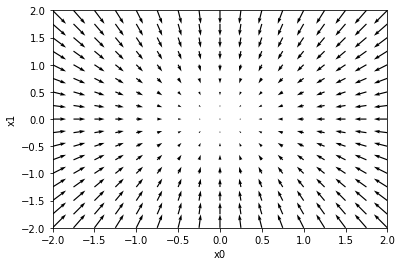

In [340]:
# 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이 표시됨

x1 = np.arange(-2,2.2,0.25)
x2 = np.arange(-2,2.2,0.25)
x,y = np.meshgrid(x1,x2)

u, v = -numerical_gradient(function_2, np.array([x, y]))
#print(u)

plt.quiver(x,y,u,v)
plt.xlabel("x0")
plt.ylabel("x1")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

경사법 (경사 하강법)

Text(0, 0.5, 'X1')

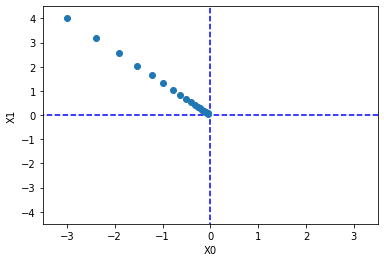

In [354]:
# lr(학습률)은 하이퍼파라미터(hyper parameter)라고 함 : 사용자 직접지정.

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.Circle((0, 0), 1, color='r')
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")


신경망 기울기

In [374]:
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simplenet:
  def __init__(self):
    self.W = np.random.randn(2,3) # 정규분포로 초기화

  def predict(self,x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

net = simplenet()
print(net.W)

x = np.array([0.6,0.9])
p = net.predict(x)
t = np.array([0,0,1])
print(net.loss(x,t))

# loss function
def f(W): 
  return net.loss(x, t)
dW = numerical_gradient(f, net.W)
net.W = dW

print(dW)
p = net.predict(x)
t = np.array([0,0,1])
print(net.loss(x,t))

[[-0.14990765  0.4073567   0.50643456]
 [-0.22605842 -0.080181    0.08890146]]
0.8403911556003308
[[ 0.13153445  0.20954051 -0.34107497]
 [ 0.19730168  0.31431077 -0.51161245]]
1.8624449993417815


손글씨 학습

In [0]:
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self_params['W2']
    b1, b2 = self.params['b1'], self_params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y,t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy

  # x : 입력 데이터, t : 정답 레이블
  def numerical_gradient(self,x,t): # 5장에서 오차역전파로 속도향상 예정 (gradient 함수)
    loss_W =lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

미지배치 학습 구현

In [382]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list=[]

#하이퍼파라미터
iters_num = 10000 #반복
train_size = x_train.shape[0]
batch_size=100 #미지배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  #print(i)
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  #grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch) # 성능 개선된 버전

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193

In [389]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#하이퍼파라미터
iters_num = 10000 #반복
train_size = x_train.shape[0]
batch_size=100 #미지배치 크기
learning_rate = 0.1

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

# 1에폭당 반복 수
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  #grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch) # 성능 개선된 버전

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # 1에폭당 정확도 계산
  if i%iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09961666666666667, 0.1008
train acc, test acc | 0.7837833333333334, 0.7892
train acc, test acc | 0.8756, 0.8796
train acc, test acc | 0.8984833333333333, 0.9029
train acc, test acc | 0.9089833333333334, 0.9124
train acc, test acc | 0.91565, 0.9168
train acc, test acc | 0.9216333333333333, 0.9236
train acc, test acc | 0.9247666666666666, 0.9268
train acc, test acc | 0.92875, 0.9299
train acc, test acc | 0.9318, 0.9319
train acc, test acc | 0.93465, 0.935
train acc, test acc | 0.9376166666666667, 0.9368
train acc, test acc | 0.9401166666666667, 0.9386
train acc, test acc | 0.9421833333333334, 0.9411
train acc, test acc | 0.9447, 0.9424
train acc, test acc | 0.9453, 0.9434
train acc, test acc | 0.9473, 0.9447
